# EAS 4610 - Earth Systems Modeling - Final Project
## Landscape Evolution - Changes in Elevation due to Erosion over Time
### By: Carson Clements, Maci Harrell, Kevin Lu
### Due: Tuesday, December 5th at 11:59 PM ET
### Requirements/Rubric: https://gatech.instructure.com/courses/321828/assignments/1404688
## Original Paper (Landscape Evolution, Willgoose 2004): https://www.annualreviews.org/doi/pdf/10.1146/annurev.earth.33.092203.122610

### Introduction

Paper: Mathematical Modeling of Whole Landscape Evolution (Willgoose 2004)

This paper discusses various methodologies for landform evolution models (LEMs), their advantages and disadvantages, and the various geologic processes that inform these models. The paper explores concepts such as mass conservation, detachment- and transport-limited processes, channel processes, hillslope erosion, soil properties, tectonics, depositional structures, and numerical challenges in model implementation. The main theme revolves around the development and application of modern LEMs and their contributions to understanding observed geomorphology, testing long-term process links, and addressing practical applications in Earth sciences. The specific focus of our simulation models is on the erosion of hill terrain, employing the advection-diffusion equation to demonstrate geomorphology over relatively short timescales. While our implementation centers on the CAESAR methodology, the paper extensively discusses various approaches such as SIBERIA, ARMOUR, DELIM, GOLEM, among others. Our simulations allow us to manipulate factors like tectonic uplift and entrainment frequency, providing a basis for comparison with the author's insights into their impacts on different LEMs.

### Equations

The primary component of most soil evolution models is erosion, which follows the mass balance equations. The mass balance equation cannot truly reconstruct complex landscapes but provides a basis for modeling. The mass balance equation below in its original form has (z) as the elevation, (U) as the rate of tectonic uplift and (Q_s) as the sediment transport flux. The divergence term multiplied with (Q_s) can be interpreted as the influx of sediments. 

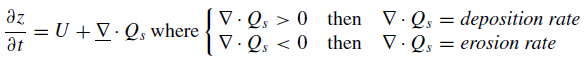

The equation can be simplified to the form below where (D) is the detachment rate. The detachment rate however may vary with many factors such as grading of the material that complicates things. 

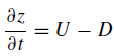

The CAESAR model formula (below) solves for sediment transport with a probabilistic Lagrangian solver. This eliminates the need to consider detachment limitations. In this formula, (Lambda) is the frequency of entrainments per area per time unit, (M) is the mass of the entrainment event, and (L) is the travel distance of the sediment. 

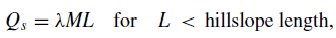

Higher frequency, mass transported per event, and longer travel distance all contribute to more mass being transported and subsequently results in larger Q_s values. This model is valid as long as the (Lambda) values aren’t too low and the sediment travel distance (L) is less than the hillslope length, because the probability of each of those variables are statistically independent. 

We couldn’t find any established values for each of those variables, so we had to assume them based on the context of the simulation. We used very large values for (Lambda) and very small values for (M) because erosion is typically a process that is happening very frequently but with very small amounts. 

Another way to calculate Q_s is to multiply the sediment velocity (U) by its depth (R). 

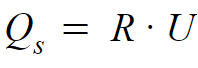

To approximate the initial landscape, we used the bell shaped function where height (z) is a function of (x) with adjust parameters such as the peak height (h) of the slope, horizontal coordinate (b) on grid, and width constant (w) of slope. In our simulation, the (L) values are significantly smaller than hillslope length which stays within the confines of the CAESAR method.

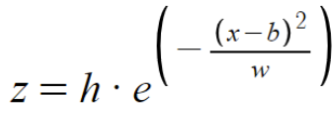

After much debate and haggling over the exact properties we wished to confine ourselves and our model to, we ultimately decided on a pair of Dirichlet Boundary conditions. What this does is prevent the model from essentially attempting to force advection in a flow pattern not explicitly stated, preventing the kind of “blowback” that can happen to reflective boundaries in wave equation models. Our model is specifically designed to avoid the flow randomly reversing only a few meters past the slope - we’re concerned about how a dominant flow regime at differing speeds and with differing amounts of outside influences (such as sediment depth, velocity, transport capacity, and tectonic uplifting) are affecting a given isolated hill. We are not trying to have that flow be dictated by phantom walls surrounding the hill, but we are wanting to see our flow remain constant throughout the simulation without significant loss of sediment within our controlled environment. It could also technically be argued that, since we’ve locked our flux rates for a majority of our model runs, we have also created a Neumann boundary condition, but since these fluxes were ultimately altered to have a non-constant comparison, this argument does not work for that aspect of the model. Therefore, our decision to maintain the constant flow within the simulation and prevent blowback/reflective actions can be best described as a pair of Dirichlet Boundary conditions.

### Numerical Methods

One of the issues with properly modeling landscape evolutions is that there is not only an issue with choosing the appropriate units to prevent glaring inaccuracies with the dataset (as a shorter or longer timestep/slice of land can have massive implications on the modeling abilities for short-term and long-term landscape evolutions, from sudden landslides occurring over seconds to erosion and deposition over thousands of years), but also that there is two conflicting methods of choice for use. Method #1, which we ultimately chose, involves making forward steps in time with Forward Euler (which relies on the current timestep to solve for the next), and opting for a centered difference scheme for both Advection and Diffusion. In layman’s terms, this is essentially using the previous space-step or spatial value and the current step’s succeeding spatial value (which is the first step after the current timestep in this nomenclature) and approximating the current spatial value. Using the i-1 and i+1 space steps in order to solve for the i-step is what centered difference is.

The other potential method had us switch away from utilizing centered differencing for advection, instead opting for an “upwind” advection scheme. Essentially, we’re assuming that, in this method, all sediment travels with the flow and does not deviate in any significant manner. This presented two immediate problems to us: one, this second method is much more prone to instability and only works with a forced Courant Number of 1, and two, we must assume that not only is our advection/diffusion are constant values (which does not hold under a sudden landslide scenario or even with long enough periods of time with respect to general erosion) but that our sediments will always be traveling at a rate equal to the flow. This is not to mention that there are further tradeoffs with our ability to model advection and diffusion under this method, especially if we attempted to model a near-zero sediment flow and/or negative sediment flux.

Therefore, we have opted to make use of the first Method, which does have its own drawbacks - our results are likely overly diffusive and may imply a different landscape evolution than shown - but they are less detrimental for our attempts to model both long-range erosive/depositive patterns and short-range mass entrainment events. Not only are we less constrained with maintaining an even narrower range of stability that we would be required to do so for Method 2 (again, this has tradeoffs), but also, because of that stability freedom, we are able to manipulate the various coefficients of advection and diffusion within a wider range to better represent the swath of potential erosive environments that exist.

The image below of the two methods from our notes during lecture demonstrates the point I was making above much more succulently.

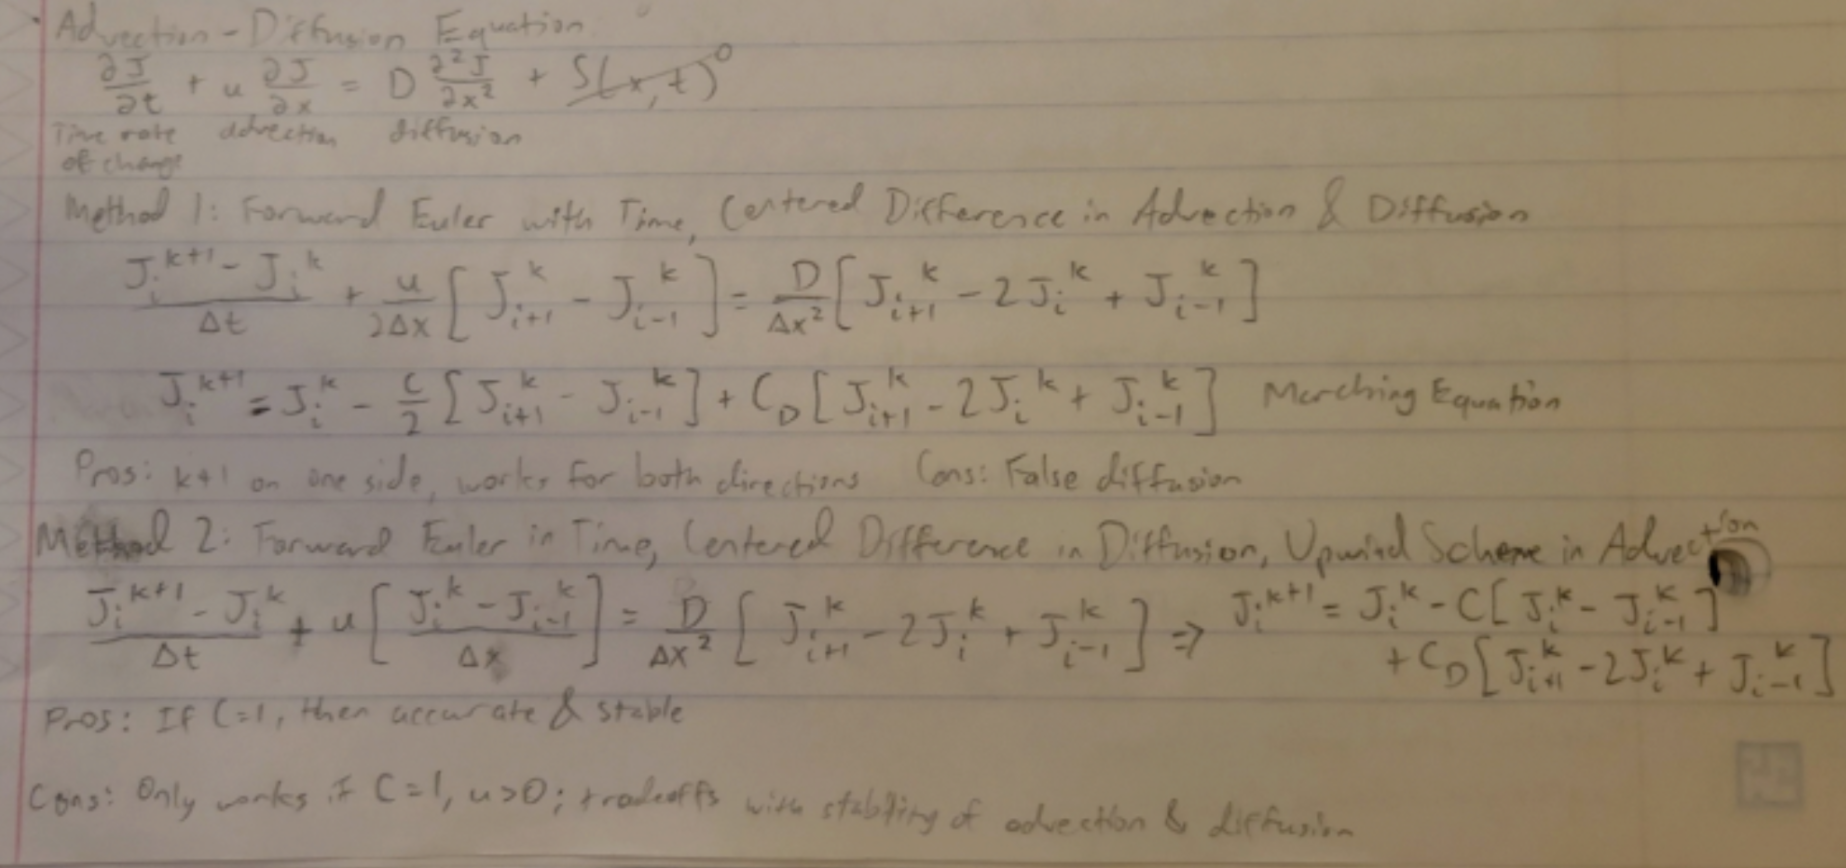

### Results

Our simulations model the erosion of slopes over long time scales by employing the advection diffusion equation where the CAESAR methodology is used to calculate the diffusion coefficient. In our simulation, we used a 100x500 grid with a horizontal grid length of 100 meters and simulation time period of 1000 years. Each grid step on the x-axis represents 1 meter. Each grid step on the y-axis represents 2 years. Each of these values was chosen to not only maximize the amount of usable data over the erosive period, but also to ensure that we would not have any concerns over the stability of the model while still presenting a reasonable depiction of a small piece of terrain, as is reflected in our graphs.

We utilized a basic bell curve function, used to model the initial slope, and we scaled it up in height so that the peak is 20 meters. Given that our simulation is a rough estimate of what a hill of this size or larger could lose comparatively to a diffusive and erosive environment, this value was acceptable. The width was also scaled up to appropriately maintain the proportions of the curve and fit within the grid. The slope was translated 50 meters in the +x direction so that it would be at the center of the grid row. This allows for the detection of advection and diffusion in both x-directions, though in practice we maintained a singular advective pattern (wind blowing from the -x direction to the +x direction) for simplicity and for a lack of intriguing results.

In our simulation, we tested how the erosion evolution would change if we were to change the diffusion/advection values or consider the effects of tectonic uplift at a rate of 0.5 cm per year. We also compared the results using a different formula for Q_s - one where we assumed that Q_s was mostly diffusive and equivalent to λML for L < hillslope length, and another form of Q_s equivalent to R*U (sediment depth*sediment velocity, not Tectonic Uplift or the advection coefficient). 

Figure 1 compares the erosion between higher and lower diffusion values. It appears that higher diffusion values result in a much quicker flattening of the slope with time. In turn, we can make the assumption that, based upon this result, we can expect that a greater wind flow will result in faster erosion and a less-defined terrain feature over time, all other factors being equal. Figure 3 compares the erosion between higher and lower advection values. Higher advection values resulted in more horizontal displacement of the slope with time. This again implies that the increase of advection in a higher-flow regime would ultimately result in the terrain feature shifting to “follow” the flow, for lack of a better term. Figure 2 compares the slope height erosion that accounts for tectonic uplift. Tectonic uplift of 5 mm per year is equivalent to 5 meters over the time scale of the simulation, which is somewhat significant for the scale of the terrain used in our simulation. A gradual increase of depth over the length of the simulation can be observed on the depth color scale of figure 2. Toward the end of the simulation, the Qs = RU output in particular, show signs that the tectonic uplift is outpacing the erosion rate. 

Figure 4 illustrates a scenario when both diffusion and advection values are high. There’s a quick flattening of the slope and large horizontal displacement of the sediments. We’ve discovered that any advection/diffusion values beyond that would cause the simulation to be unstable. While it would be easy to chart up any of these potential issues as being unrealistic, this is much more likely reflective of the limitation of the model and may be avoidable if we had opted for Method 2, as discussed in the Methods section. Figure 5 featured a regime of high diffusion and advection, as well as significant tectonic uplift. Now, with the changes maximized from the default system, we began to more clearly run into the limitations of the basic advection-diffusion model we adopted for this project. Not only is Q_s drastically different under the two ways of calculation already but also we are running into the issue of where all 3 categories are additive to one another, resulting in a final terrain feature that is much less distinct than in any other 4-panel figure.

It should be noted that we had also tested a high advection & significant uplift model comparison (and a high diffusion & significant uplift model), but these results were ultimately not included in the final product due to a lack of compelling data not already displayed in other figures. Their expected results matched up quite well with what you would expect in a rapid flow pattern with quick deposition downstream, despite the attempted influence of tectonic uplifting. Again, this points to tectonic uplift being unable to keep up with a high-advection scheme, which is a result one can expect when dealing with such small terrain. Even the most mountainous regions can suffer heavily under high-wind regimes, losing large amounts of material over short periods of time, which is extrapolated but still somewhat reflective of reality within our model.

It’s difficult to directly compare results with other models due to the specificity of the initial conditions and terrain, but ultimately the results obtained were still roughly in line with other models of erosion. Monograph models such as (Gilbert, 1877) determine erosion based on the steepness of the slope where erosion rates slow down the flatter the terrain becomes. Although our simulation does not consider the slope directly, it achieved a similar erosion evolution where erosion tapers with less height. This was most clearly seen when considering the Q_s value as a product of depth and velocity, though this version of the model was likely over-dispersive due to the false diffusivity produced by Method 1. Such a discrepancy is unfortunately unavoidable due to us essentially “stress-testing” the first Method in order to determine its limitations and running with those results. Further work and insight into the viability of the second Method to cover for the limitations of the first should be considered and done for the next LEM in this class.

As for what can be sort of expected in these types of environments, none of our model’s data should be considered especially surprising. In stronger flow regimes, our model demonstrated that the higher advection rates that come from such dominant wind patterns result in large-scale mass transport, which is something we've observed and confirmed even over shorter timescales than the 1000 years in this model. Again, our model is a rough extrapolation of a real-world environment with relatively high erosion rates for purposes of simplicity; while such rates of complete annihilation of significant terrain are unlikely, the power of erosion cannot be overstated, and mass entrainment events even on these smaller hillsides can have massive effects. A similar effect can be determined for areas with looser soils (and therefore a much higher diffusivity, especially under higher-wind regimes). One great example is the transport of sediment with respect to sandbars, which could be a finding one could extract from the model as a representation of such a fluid terrain environment. 

As for improvements, there are plenty that have been previously mentioned and plenty more that we could ramble on about. From being able to accurately diagnose the effect of landslides on terrain features to the greater detail that can only be provided by a higher-resolution model to even the implementation of higher-order methods to more accurately depict advection, diffusion, and uplift over time, there are plenty of avenues for refinement and recalculation. Even a basic addition of factoring in some amount of increased flow due to runoff as a side-effect of slope grade would be a massive improvement in some areas of this model. However, due to time constraints and as a manner of reducing complexity on what should be a relatively simple concept and model to emulate, we ultimately decided to limit our model as illustrated previously. This was not out of a desire for avoiding concepts or pretending that the world is simpler than it is - we just wanted to ensure that the major aspects of long-term erosion (with interpolated evidence of short-term mass entrainment events were also somewhat included) of advection, diffusion, and uplift to be emphasized. This led us to the simple but flawed model we have based our project around, and the paper from whence it came.

### References

Pazzaglia, F. J. (2003). Landscape evolution models. Developments in Quaternary Sciences, 1, 247–274. https://doi.org/10.1016/s1571-0866(03)01012-1
Willgoose, G. (2005). Mathematical modeling of whole landscape evolution. Annual Review of Earth and Planetary Sciences, 33(1), 443–459. https://doi.org/10.1146/annurev.earth.33.092203.122610

### The Necessary Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parameterization and Grid-Setting

In [2]:
# Parameters
Grid_Length = 100  # Length in meters
T = 1000   # Simulation time - years

Nx = 100   # Number of spatial grid points
Nt = 500   # Number of time steps
dx = Grid_Length / (Nx - 1)
dt = T / Nt

Slope_Peak = 20 # meters
Slope_Width_Constant = 100

U = 0.005     # Tectonic Uplift - meters per year
lamb = 365*24*60 # Occurrence of entrainment (detachment) events
M = 1e-7 # The average mass of sediment per entrainment event
L = 1 # the average travel distance of the sendiment - meters

# Advection and diffusion coefficients
u = 0.01   # Advection velocity - Transport of landscape downwind with time - meters per year

### Defining Functions for a Constant Qs

In [3]:
def Initialize(Nx, Slope_Width, Slope_Peak, Nt):
    # Initial condition with slope
    X = np.arange(0, Nx, 1)
    R_initial = (np.exp(-((X-(0.5*Nx))**2)/Slope_Width))*Slope_Peak

    # Arrays to store the regolith depth at each grid point and time step
    R = np.zeros((Nt, Nx))


    # Set initial & Dirichlet boundary condition
    R[0, :] = R_initial
    R[:, 0] = R_initial[0]  # Left boundary
    R[:, -1] = R_initial[-1]  # Right boundary
    
    return R

In [4]:
def Solve(R, Adv_Coeff, deltaT, deltaX, Tec_Uplift, lamb, M, L):
    # Finite difference scheme for advection-diffusion equation with Dirichlet and Neumann boundary conditions
    Diff_Coeff = lamb*M*L  # Diffusion coefficient - equivalent to Qs
    
    for k in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            advection_term = Adv_Coeff * (R[k, i + 1] - R[k, i - 1]) / (2 * deltaX)
            diffusion_term = Diff_Coeff * (R[k, i + 1] - 2 * R[k, i] + R[k, i - 1]) / deltaX**2
            R[k + 1, i] = R[k, i] + deltaT * (diffusion_term - advection_term + Tec_Uplift)
    return R

### Defining Functions for a non-Constant Qs

In [5]:
def VInitialize(Nx, Slope_Width, Slope_Peak, Nt): # Initializing the Grid
    # Initial condition with slope
    X = np.arange(0, Nx, 1)
    R_initial = (np.exp(-((X-(0.5*Nx))**2)/Slope_Width))*Slope_Peak

    # Arrays to store the regolith depth at each grid point and time step
    R = np.zeros((Nt, Nx))

    # Set initial & Dirichlet boundary condition
    R[0, :] = R_initial
    R[:, 0] = R_initial[0]  # Left boundary
    R[:, -1] = R_initial[-1]  # Right boundary
    
    return R

In [6]:
def VSolve(R, Adv_Coeff, deltaT, deltaX, Tec_Uplift, sed_Vel):
    # Finite difference scheme for advection-diffusion equation with Dirichlet and Neumann boundary conditions
    # Variable Value for Qs based upon Formula D = Qs = Depth*Sediment Velocity
    for k in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            Diff_Coeff = R[k, i] * sed_Vel
            advection_term = Adv_Coeff * (R[k, i + 1] - R[k, i - 1]) / (2 * deltaX)
            diffusion_term = Diff_Coeff * (R[k, i + 1] - 2 * R[k, i] + R[k, i - 1]) / deltaX**2
            R[k + 1, i] = R[k, i] + dt * (diffusion_term - advection_term + Tec_Uplift)
            #print(Diff_Coeff)
    return R

## Figures

### Plot 1 - Low vs High Diffusion

Text(0, 0.5, 'Time (t) in Years')

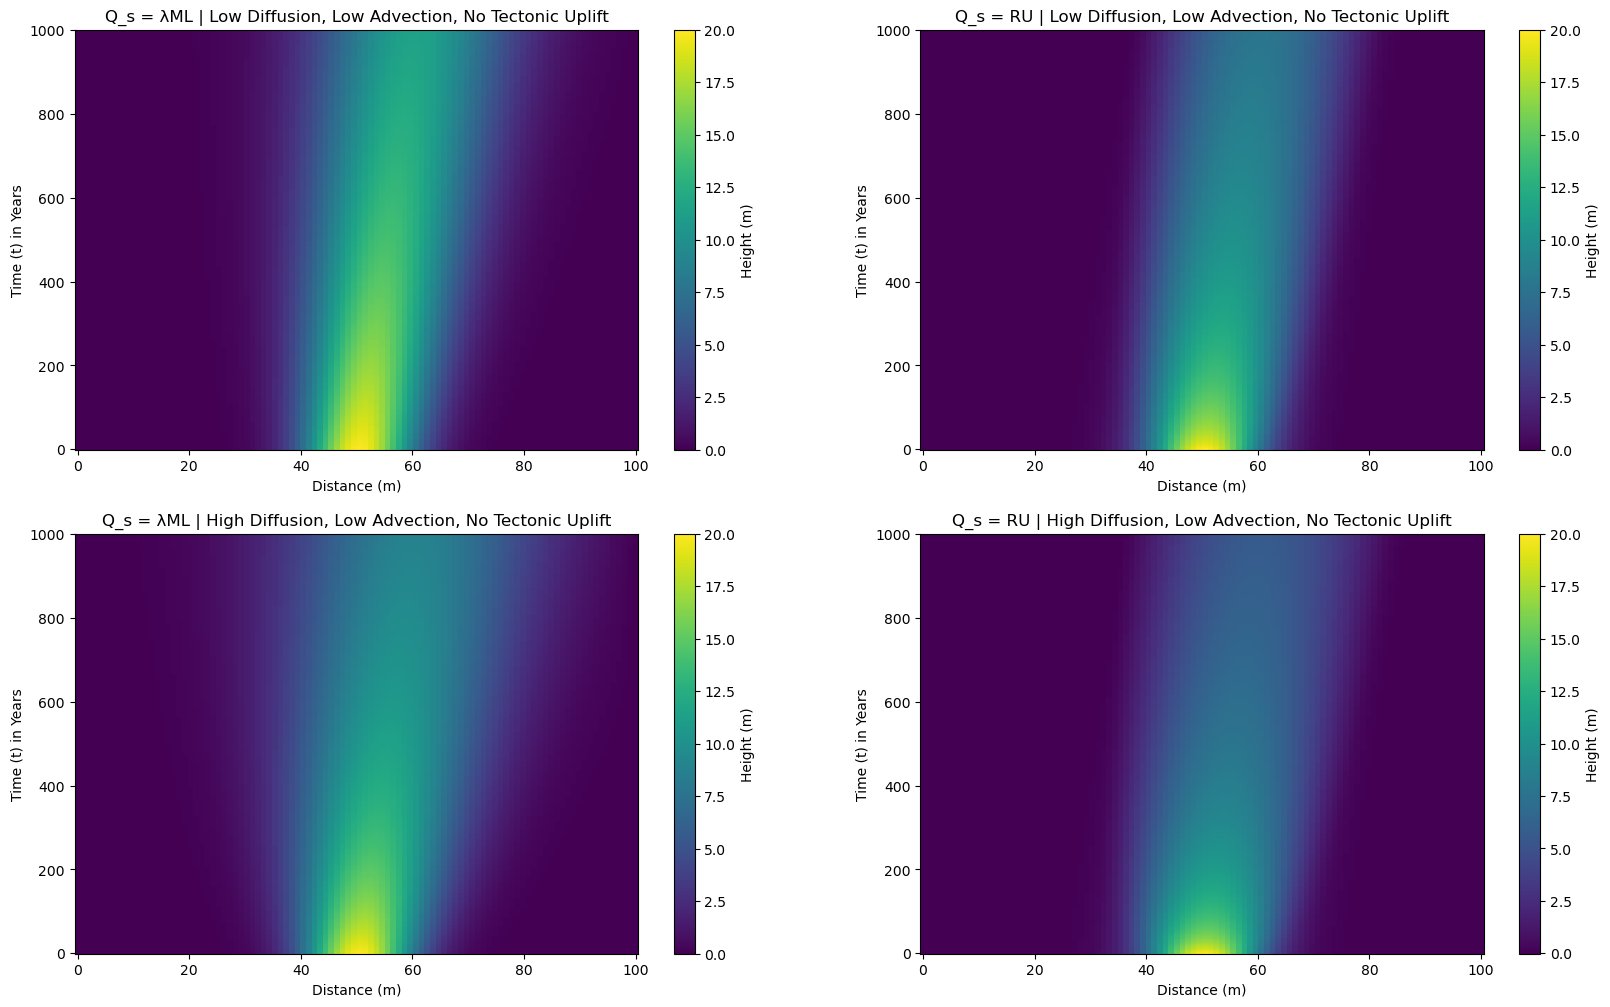

In [7]:
# Plot the results with Dirichlet and Neumann boundary conditions - 4 Panel Plots
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, dt, dx, 0, lamb, M, L)

R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, u, dt, dx, 0, 0.01)

R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, u, dt, dx, 0, lamb, M*2, L)

R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, u, dt, dx, 0, 0.01*2)


x_values = np.linspace(0, Grid_Length, Nx)
time_values = np.linspace(0, T, Nt)


plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title(label='Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift', fontsize=12)
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 2)
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title(label='Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift', fontsize=12)
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 3)
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title(label='Q_s = λML | High Diffusion, Low Advection, No Tectonic Uplift', fontsize=12)
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 4)
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title(label='Q_s = RU | High Diffusion, Low Advection, No Tectonic Uplift', fontsize=12)
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

### Plot 2 - Insignificant vs Significant Tectonic Uplift

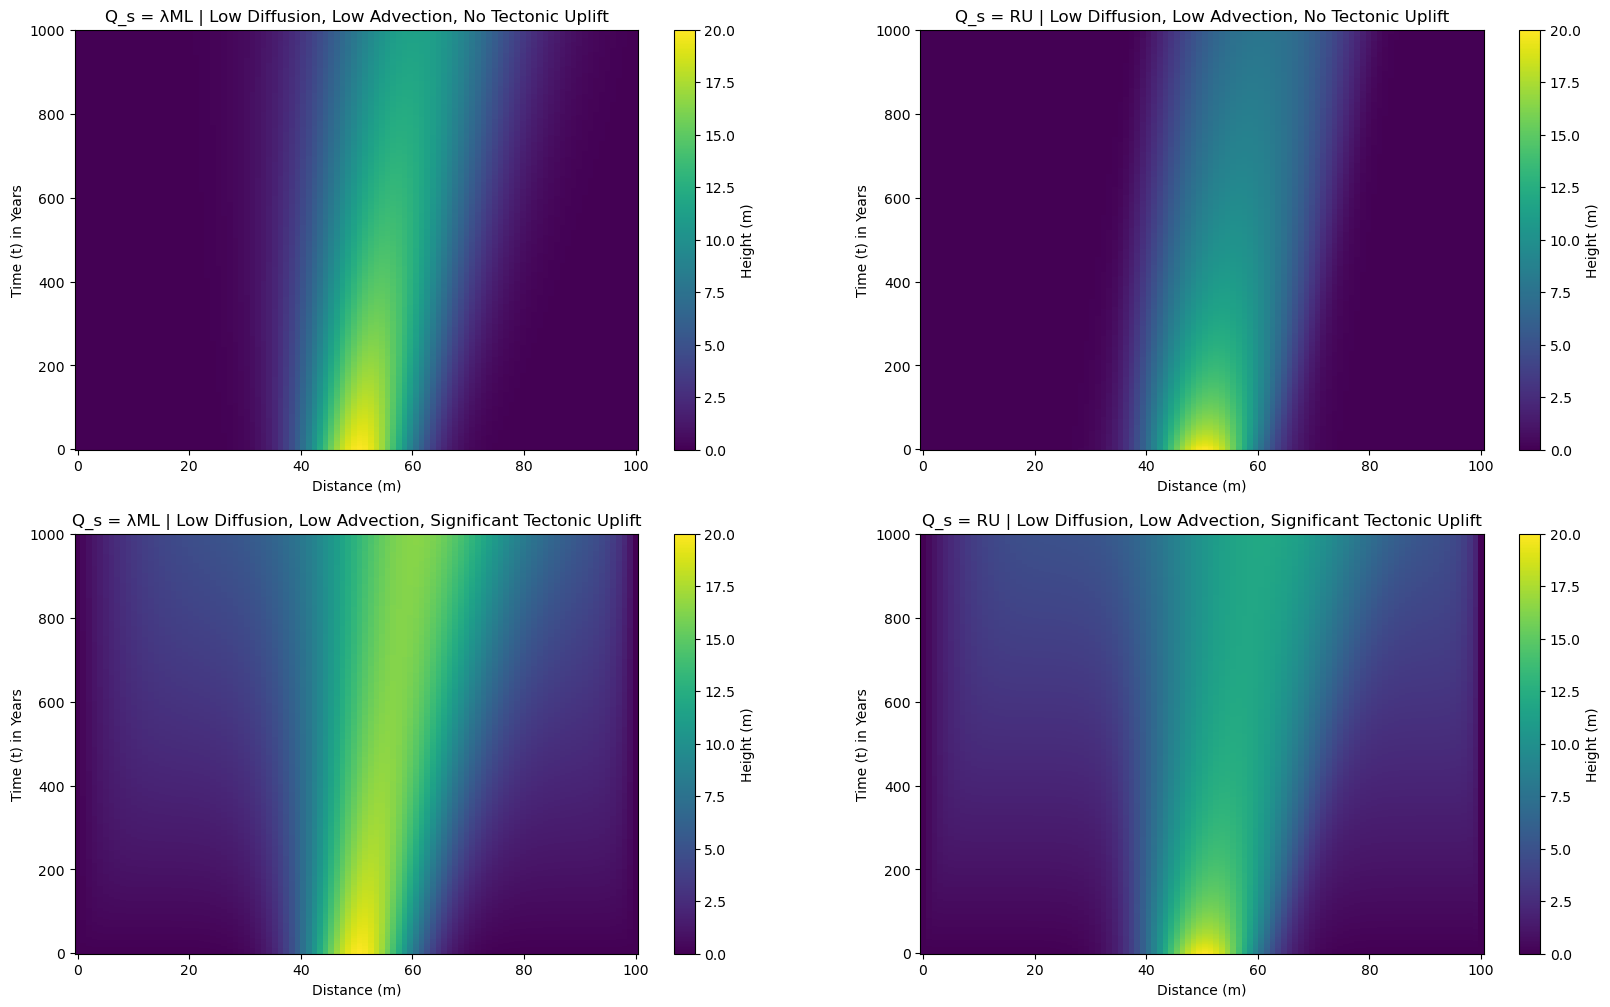

In [8]:
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, dt, dx, 0, lamb, M, L)

R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, u, dt, dx, 0, 0.01)

R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, u, dt, dx, U, lamb, M, L)

R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, u, dt, dx, U, 0.01)


plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 2)
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 3)
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, Low Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 4)
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, Low Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 3 - Low vs High Advection

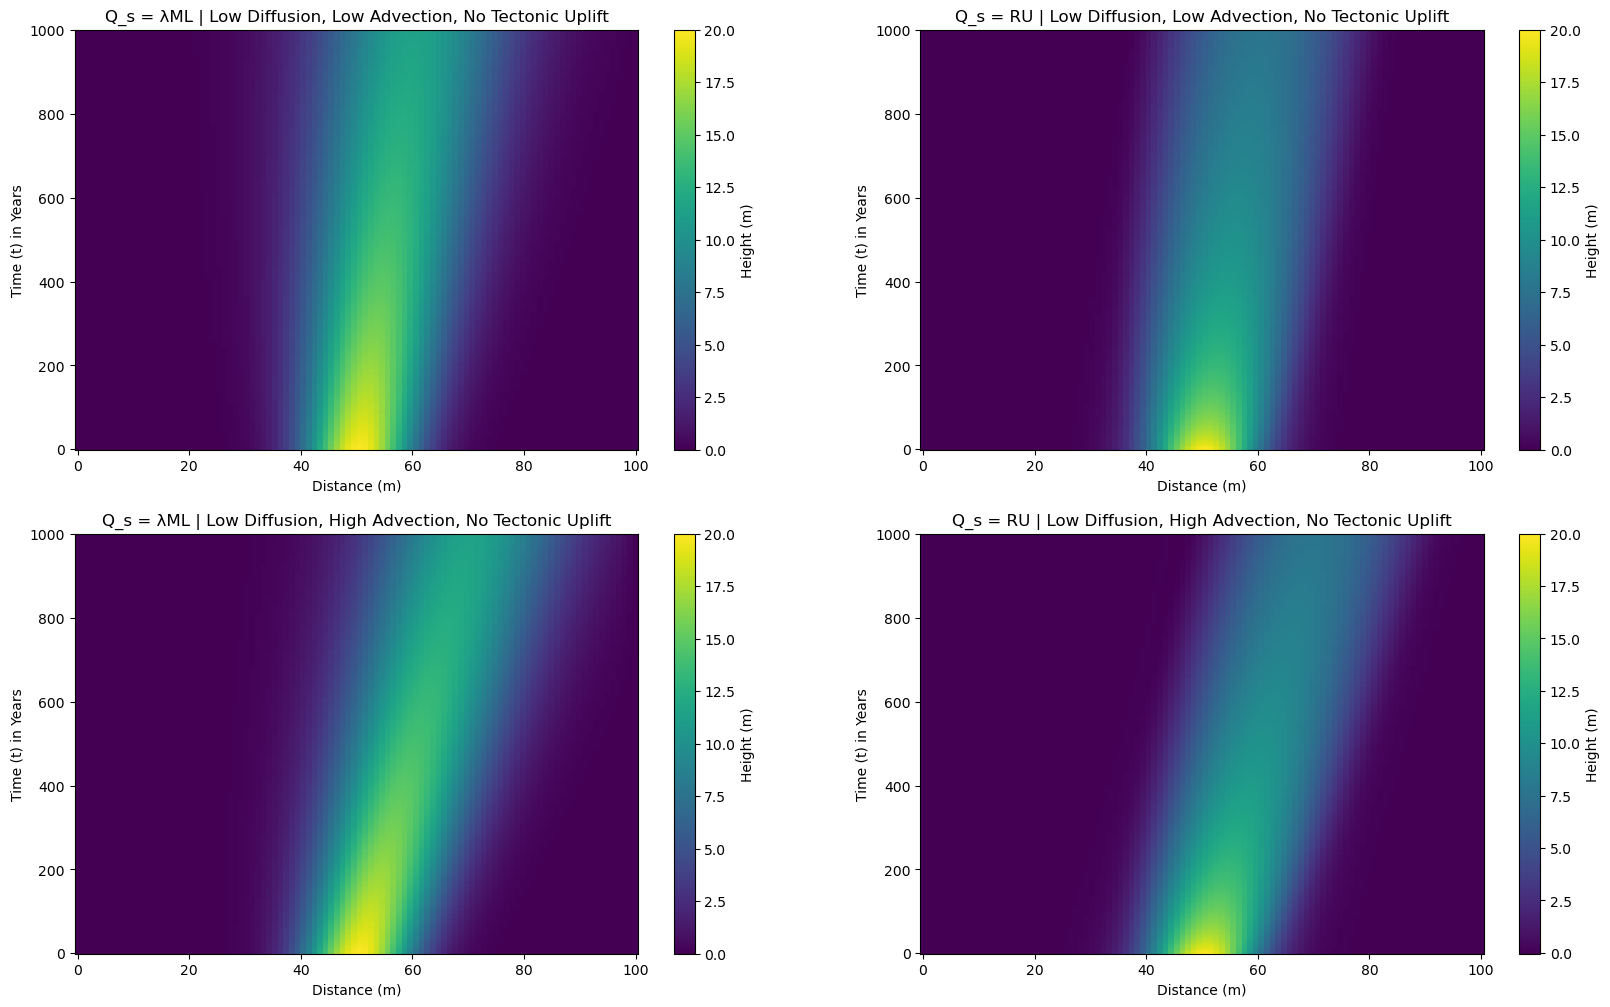

In [9]:
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, dt, dx, 0, lamb, M, L)

R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, u, dt, dx, 0, 0.01)

R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, 2*u, dt, dx, 0, lamb, M, L)

R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 2*u, dt, dx, 0, 0.01)


plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 2)
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 3)
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 4)
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 4 - Low vs High Advection/Diffusion

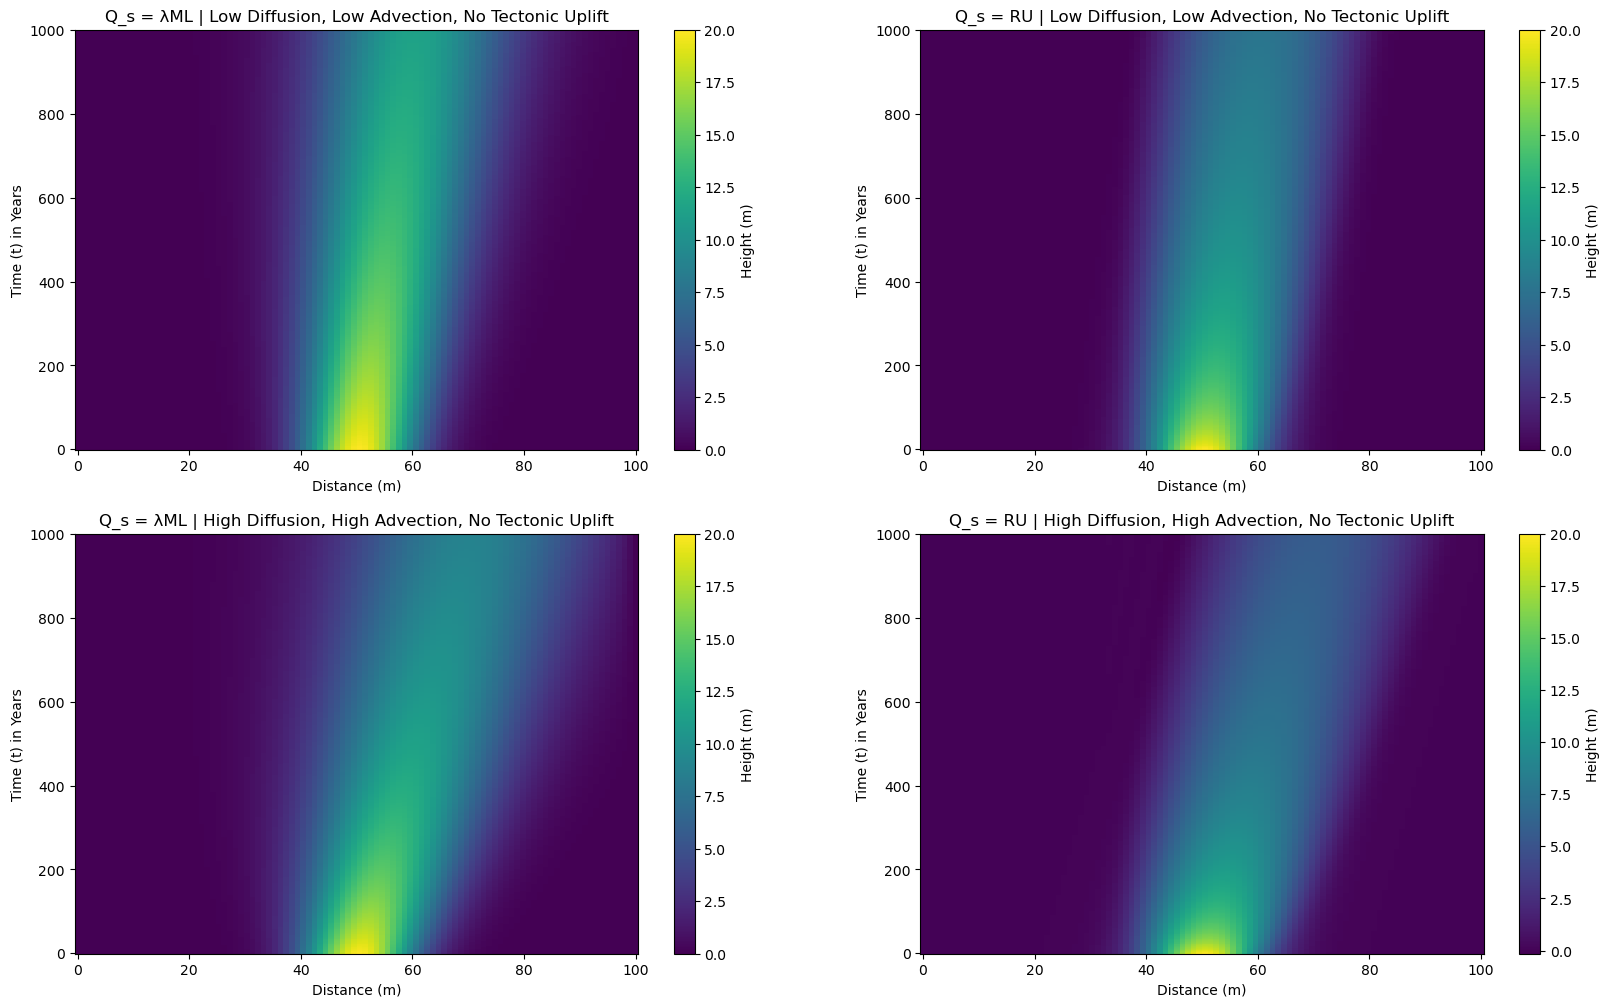

In [10]:
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, dt, dx, 0, lamb, M, L)

R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, u, dt, dx, 0, 0.01)

R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, 2*u, dt, dx, 0, lamb, M*2, L)

R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 2*u, dt, dx, 0, 0.01*2)


plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 2)
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 3)
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | High Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 4)
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | High Diffusion, High Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Plot 5 - Low vs High Advection/Diffusion/Uplift

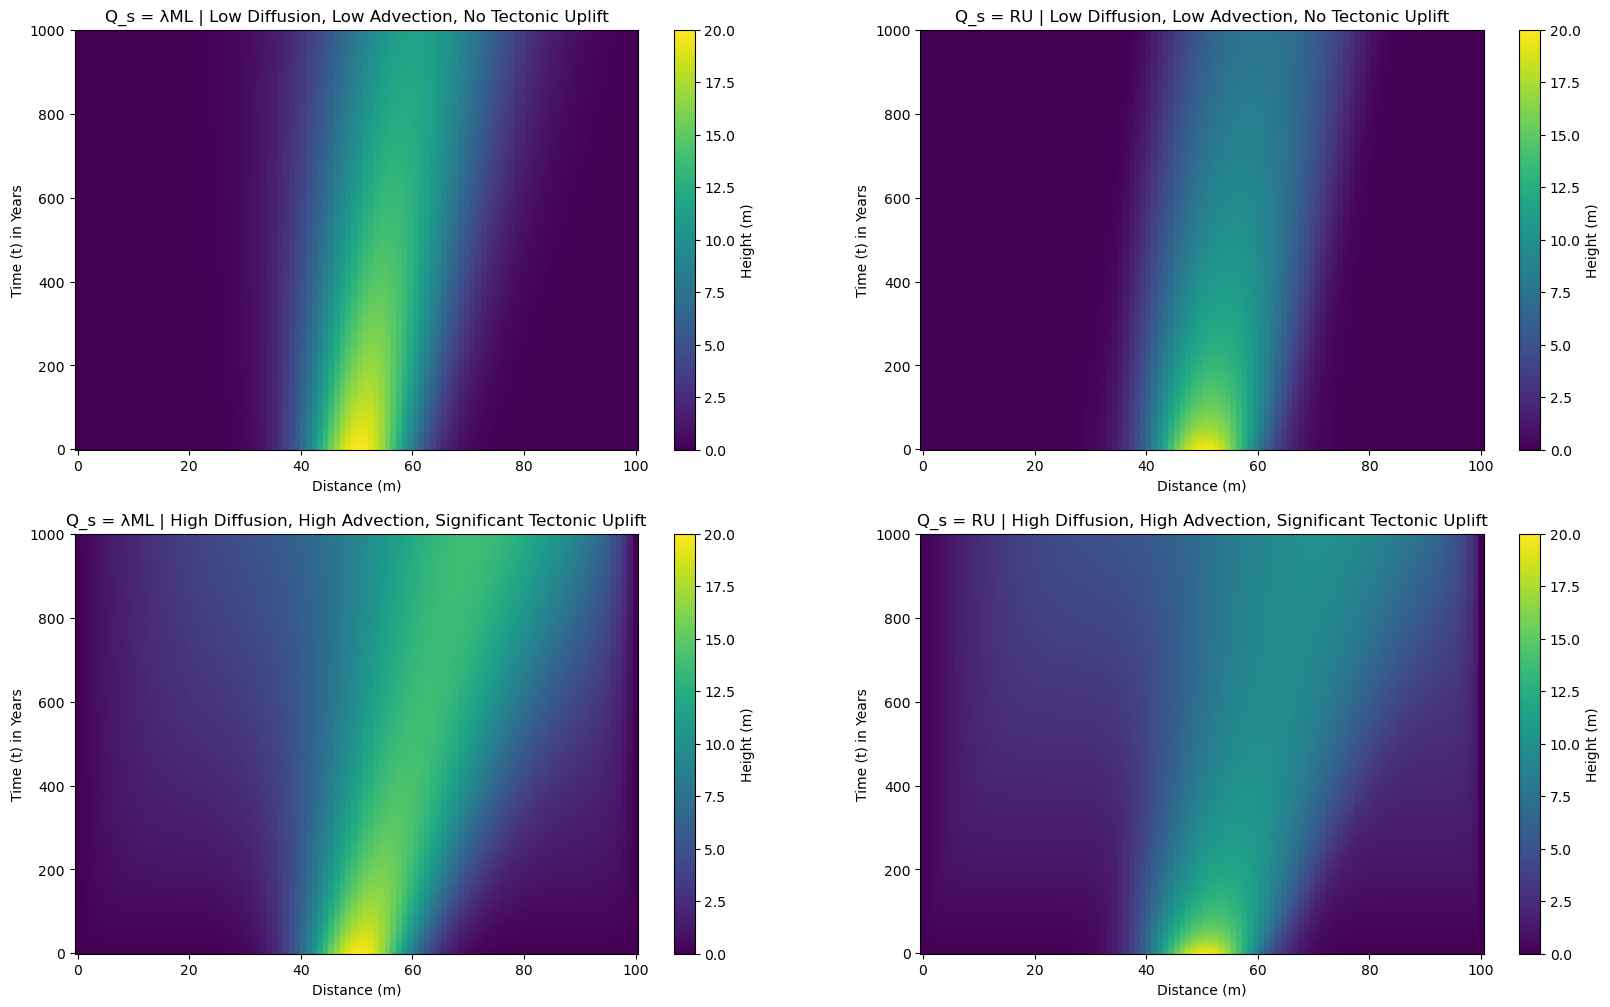

In [12]:
R1 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R1 = Solve(R1, u, dt, dx, 0, lamb, M, L)

R2 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R2 = VSolve(R2, u, dt, dx, 0, 0.01)

R3 = Initialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R3 = Solve(R3, 2*u, dt, dx, U, lamb, M*2, L)

R4 = VInitialize(Nx, Slope_Width_Constant, Slope_Peak, Nt)
R4 = VSolve(R4, 2*u, dt, dx, U, 0.01*2)


plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.pcolormesh(x_values, time_values, R1, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 2)
plt.pcolormesh(x_values, time_values, R2, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | Low Diffusion, Low Advection, No Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 3)
plt.pcolormesh(x_values, time_values, R3, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = λML | High Diffusion, High Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')

plt.subplot(2, 2, 4)
plt.pcolormesh(x_values, time_values, R4, shading='auto', cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Q_s = RU | High Diffusion, High Advection, Significant Tectonic Uplift')
plt.xlabel('Distance (m)')
plt.ylabel('Time (t) in Years')
plt.show()

### Video Walkthrough

https://www.youtube.com/watch?v=h8VlpS9n-bY